# Procesamiento de Lenguaje Natural (NLP)



Este fragmento de código se encarga de la **preparación del entorno de ejecución** y la **importación de dependencias** fundamentales para un proyecto de manipulación de datos, típicamente en un entorno como Google Colab o un Jupyter Notebook.

-----

## Desglose del Código

1.  **`#@title Preparamos Dataset de Medios de Latinoamérica .`**

      * **Función**: Esto es un comentario especial utilizado por Google Colab. La sintaxis `#@title` convierte el texto que le sigue en el título de la celda de código. Es una herramienta puramente organizativa y de legibilidad que no tiene ningún efecto sobre la ejecución del código.

2.  **`%%capture`**

      * **Función**: Este es un "comando mágico" de IPython/Jupyter, específicamente un *magic de celda* (indicado por el doble `%`). Su propósito es **capturar y suprimir la salida estándar (`stdout`) y el error estándar (`stderr`)** de la celda.
      * **Se utiliza**: Se utiliza para mantener el notebook limpio y legible, ocultando los logs de instalación de `pip`, que suelen ser muy extensos. En lugar de mostrar todas las líneas de descarga y construcción del paquete, la celda se ejecuta silenciosamente.

3.  **`!pip install datasets`**

      * **Función**: Ejecuta un comando en el shell del sistema operativo subyacente. El signo `!` es la sintaxis que usan los notebooks para pasar comandos al terminal.
      * **Se utiliza**: `pip` es el gestor de paquetes de Python. Este comando instruye a `pip` para que descargue e instale la biblioteca `datasets` de Hugging Face. Esta biblioteca es un estándar de la industria del Machine Learning para acceder y manipular grandes volúmenes de datos de manera eficiente. Utiliza formatos en segundo plano como Apache Arrow para permitir el trabajo con datasets que exceden la memoria RAM disponible mediante técnicas de *memory mapping*.

4.  **`import pandas as pd`**

      * **Función**: Importa la biblioteca `pandas` y le asigna el alias `pd`.
      * **Se utiliza**: `pandas` es la herramienta principal en el ecosistema de Python para la manipulación y análisis de datos tabulares en memoria. La estructura de datos clave es el `DataFrame`. El uso del alias `pd` es una **convención universalmente aceptada** en la comunidad de ciencia de datos, lo que mejora drásticamente la legibilidad y la colaboración en el código. Este tipo de importación (namespace aliasing) evita la contaminación del espacio de nombres global y previene colisiones de nombres.

5.  **`from datasets import load_dataset`**

      * **Función**: Importa selectivamente solo la función `load_dataset` del módulo `datasets`.
      * **Se utiliza**: A diferencia de `import pandas as pd`, aquí se opta por una **importación específica**. Esto trae la función `load_dataset` directamente al espacio de nombres del script, permitiendo llamarla como `load_dataset()` en lugar de `datasets.load_dataset()`. Es ligeramente más eficiente en memoria si solo se necesita esta función específica del módulo. `load_dataset` es la función principal de la biblioteca para descargar y cargar datasets desde el Hugging Face Hub, repositorios de Git, o archivos locales.

-----

## Recomendaciones y Buenas Prácticas

Aunque el código es funcional y estándar para la exploración en notebooks, se pueden hacer algunas consideraciones para entornos más robustos o de producción:

  * **Versionado de Dependencias**: Para garantizar la **reproducibilidad** del entorno, es una buena práctica fijar la versión del paquete que se está instalando. Esto evita que futuras actualizaciones de la biblioteca `datasets` rompan el código.

    ```python
    # Ejemplo de versionado
    !pip install datasets==2.19.2
    ```

  * **Separación de Responsabilidades**: En proyectos de software más grandes, la instalación de dependencias (`!pip install`) suele separarse de la lógica de la aplicación. Las dependencias se definen en un archivo `requirements.txt` o `pyproject.toml`, y se instalan una sola vez al configurar el entorno, no en cada ejecución del script. Sin embargo, para la naturaleza interactiva de los notebooks, la práctica mostrada es muy común y aceptada.

En resumen, esta celda inicializa el entorno de trabajo, instala una dependencia clave para el manejo de datos (`datasets`) y carga las librerías necesarias (`pandas` y una función de `datasets`) en la memoria para su uso posterior.


In [1]:
!rm -rf ~/.cache/huggingface/datasets
!pip uninstall -y datasets


Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.0.0


In [2]:
#@title Preparamos Dataset de Medios de Latinoamérica .
# %%capture
!pip install datasets==2.14.5
import pandas as pd

from datasets import load_dataset

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
ERROR: pip's dependency resolver does not c

***
## A continuación:
Este fragmento tiene como objetivo **cargar y consolidar múltiples datasets** en uno solo. Específicamente, itera sobre una lista de códigos de países, carga un conjunto de datos de noticias para cada uno y los une en un único DataFrame de `pandas`.

-----

## Desglose del Código

1.  **`data = pd.DataFrame()`**

      * **Función**: Inicializa una variable llamada `data` como un `DataFrame` de `pandas` vacío.
      * **Se utiliza para**: Este DataFrame actúa como un "acumulador". La intención es que en cada paso de un bucle posterior, se le añadan nuevos datos. Es el punto de partida para construir el dataset final.

2.  **`configs = [...]`**

      * **Función**: Crea una lista de Python que contiene cadenas de texto. Cada cadena es un código de dos letras que representa una configuración específica, en este caso, códigos de países de Latinoamérica (ej. 'ar' para Argentina, 'bo' para Bolivia).
      * **Se utiliza para**: Esta lista (`configs`) define los parámetros que controlarán el bucle de carga de datos. Es una forma limpia y mantenible de especificar qué subconjuntos del dataset se deben procesar. El comentario `# 'com', 'es'` indica que el autor conscientemente excluyó otras configuraciones disponibles.

3.  **`for c in configs:`**

      * **Función**: Inicia un bucle `for` que itera sobre cada elemento de la lista `configs`. En cada iteración, la variable `c` tomará el valor de uno de los códigos de país (primero 'ar', luego 'bo', y así sucesivamente).

4.  **`data_ = load_dataset("LeoCordoba/CC-NEWS-ES", c)`**

      * **Función**: Dentro del bucle, llama a la función `load_dataset` que importamos antes.
      * **Se utiliza para**:
          * `"LeoCordoba/CC-NEWS-ES"`: Es el identificador del dataset en el [Hugging Face Hub](https://huggingface.co/datasets). Identifica el dataset `CC-NEWS-ES` bajo el usuario `LeoCordoba`.
          * `c`: Este es el segundo argumento, que especifica la **configuración** del dataset a cargar. La biblioteca `datasets` usa este parámetro para cargar subconjuntos específicos. En este caso, carga las noticias correspondientes al país `c`.
          * El resultado, `data_`, no es un DataFrame, sino un objeto `DatasetDict` de Hugging Face. Este objeto es un diccionario que contiene los diferentes *splits* del dataset, como `train`, `test` o `validation`. Por ejemplo: `{'train': Dataset(...)}`.

5.  **`data = data.append(data_['train'].to_pandas())`**

      * **Función**: Esta es la línea clave donde ocurre la consolidación.
      * **Se utiliza para**: Se descompone en tres pasos:
        1.  `data_['train']`: Accede al split de entrenamiento (`'train'`) del `DatasetDict` que se acaba de cargar.
        2.  `.to_pandas()`: Convierte el objeto `Dataset` de Hugging Face a un `DataFrame` de `pandas`. Esta conversión es necesaria para poder combinarlo con nuestro acumulador `data`, que es un DataFrame.
        3.  `data.append(...)`: **Este es el punto más crítico**. El método `.append()` de pandas se utiliza para añadir las filas del nuevo DataFrame (`data_['train'].to_pandas()`) al DataFrame acumulador (`data`).

-----

### \#\# Análisis y Mejora Crítica de Rendimiento 🚀

El código es funcional, pero tiene un **problema de rendimiento muy significativo** debido al uso de `data.append()` dentro de un bucle.

  * **Ineficiencia de `append`**: El método `DataFrame.append()` **está obsoleto (deprecated)** desde la versión 1.4.0 de pandas y se eliminará en el futuro. Más importante aún, es muy ineficiente. Cada vez que se llama, `pandas` **no modifica el DataFrame existente**, sino que crea un **nuevo DataFrame en memoria** que contiene una copia de todos los datos del DataFrame original más los datos del nuevo. Esto resulta en una complejidad computacional cuadrática ($O(N^2)$), lo que significa que el proceso se vuelve exponencialmente más lento a medida que `data` crece.

## Recomendación: Usar `pd.concat` (El Método Correcto)

La forma idiomática, moderna y, sobre todo, **eficiente** de realizar esta tarea es construir una lista de DataFrames y luego unirlos todos en una sola operación con `pd.concat`.

Aquí está la versión mejorada del código:

```python
# Lista para almacenar los DataFrames individuales
lista_de_dataframes = []

configs = ['ar', 'bo', 'br', 'cl', 'co', 'cr', 'gt', 'hn', 'mx', 'ni', 'pa', 'pe', 'pr', 'py', 'sv', 'uy', 've']

print("Iniciando carga de datasets por país...")
for c in configs:
    print(f"Cargando configuración: {c}")
    # Carga directamente el split 'train' para más eficiencia
    dataset_split = load_dataset("LeoCordoba/CC-NEWS-ES", c, split='train')
    
    # Convierte a pandas y lo añade a nuestra lista
    lista_de_dataframes.append(dataset_split.to_pandas())

# Concatena todos los DataFrames de la lista en una sola operación
# Esta es la forma más eficiente
print("\nConcatenando todos los datasets...")
data = pd.concat(lista_de_dataframes, ignore_index=True)
print("¡Concatenación completada!")

```

#### **¿Por qué esta versión es superior?**

1.  **Eficiencia de Memoria y CPU**: Se evita la re-asignación y copia constante de memoria. El bucle simplemente llena una lista de Python (una operación muy rápida). `pd.concat` está altamente optimizado para calcular el tamaño final necesario, asignar la memoria una sola vez y luego copiar los datos de cada DataFrame en su lugar.
2.  **Código más Limpio**: Esta práctica es el estándar actual y es lo que un desarrollador experimentado esperaría ver.
3.  **Índice Correcto**: El parámetro `ignore_index=True` es crucial. Crea un nuevo índice continuo para el `DataFrame` final (de 0 a N-1). Sin él, tendrías índices duplicados (por ejemplo, muchas filas con índice `0`), lo cual puede causar problemas en operaciones posteriores.

En resumen, el bloque original funciona, pero su patrón de `append` en bucle es un anti-patrón de rendimiento en pandas. La refactorización a `pd.concat` es la mejora más importante que se puede hacer aquí.

In [ ]:
# data = pd.DataFrame()
# configs = ['ar', 'bo', 'br', 'cl', 'co', 'cr', 'gt', 'hn', 'mx', 'ni', 'pa', 'pe', 'pr', 'py', 'sv', 'uy', 've'] # 'com', 'es'
# for c in configs:
#   data_ = load_dataset("LeoCordoba/CC-NEWS-ES", c)
#   data = data.append(data_['train'].to_pandas())

# Lista para almacenar los DataFrames individuales
lista_de_dataframes = []

configs = ['ar', 'bo', 'br', 'cl', 'co', 'cr', 'gt', 'hn', 'mx', 'ni', 'pa', 'pe', 'pr', 'py', 'sv', 'uy', 've']

print("Iniciando carga de datasets por país...")
for c in configs:
    print(f"Cargando configuración: {c}")
    # Carga directamente el split 'train' para más eficiencia
    dataset_split = load_dataset("LeoCordoba/CC-NEWS-ES", c, split='train')

    # Convierte a pandas y lo añade a nuestra lista
    lista_de_dataframes.append(dataset_split.to_pandas())

# Concatena todos los DataFrames de la lista en una sola operación
# Esta es la forma más eficiente
print("\nConcatenando todos los datasets...")
data = pd.concat(lista_de_dataframes, ignore_index=True)
print("¡Concatenación completada!")

Iniciando carga de datasets por país...
Cargando configuración: ar


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/532703 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Cargando configuración: bo


Generating train split:   0%|          | 0/29557 [00:00<?, ? examples/s]

Cargando configuración: br


Generating train split:   0%|          | 0/107 [00:00<?, ? examples/s]

Cargando configuración: cl


Generating train split:   0%|          | 0/116661 [00:00<?, ? examples/s]

Cargando configuración: co


Generating train split:   0%|          | 0/78662 [00:00<?, ? examples/s]

Cargando configuración: cr


Generating train split:   0%|          | 0/16542 [00:00<?, ? examples/s]

Cargando configuración: gt


Generating train split:   0%|          | 0/4833 [00:00<?, ? examples/s]

Cargando configuración: hn


Generating train split:   0%|          | 0/36559 [00:00<?, ? examples/s]

Cargando configuración: mx


Generating train split:   0%|          | 0/652418 [00:00<?, ? examples/s]

Cargando configuración: ni


Generating train split:   0%|          | 0/40643 [00:00<?, ? examples/s]

Cargando configuración: pa


Generating train split:   0%|          | 0/18447 [00:00<?, ? examples/s]

Cargando configuración: pe


Generating train split:   0%|          | 0/230962 [00:00<?, ? examples/s]

Cargando configuración: pr


Generating train split:   0%|          | 0/7756 [00:00<?, ? examples/s]

Cargando configuración: py


Generating train split:   0%|          | 0/30651 [00:00<?, ? examples/s]

Cargando configuración: sv


Generating train split:   0%|          | 0/454 [00:00<?, ? examples/s]

Cargando configuración: uy


Generating train split:   0%|          | 0/80948 [00:00<?, ? examples/s]

Cargando configuración: ve


Generating train split:   0%|          | 0/33148 [00:00<?, ? examples/s]


Concatenando todos los datasets...
¡Concatenación completada!


In [ ]:
data = data.drop('id', axis=1).reset_index(drop=True)

# Hacemos "downsampling" tomando maximo n_min para

# los grupos que tienen > n_min, y todos para los que tienen menos

n_min = 1000

df_grouped = data.groupby("country")

df_grouped.groups.values()

frames_of_groups = [x.sample(n_min) if x.shape[0] > n_min else x for y, x in df_grouped]

data = pd.concat(frames_of_groups)

Este fragmento se enfoca en dos tareas principales: una **limpieza final** del DataFrame y una operación de **submuestreo estratificado (stratified downsampling)** para balancear la cantidad de datos por país.

-----

## Desglose del Código

1.  **`data = data.drop('id', axis=1).reset_index(drop=True)`**

      * **Función**: Esta es una operación encadenada de `pandas` para limpiar el DataFrame.
      * **Nivel de Ingeniería**:
          * `data.drop('id', axis=1)`: Elimina la columna llamada `'id'`. El argumento `axis=1` es fundamental, ya que especifica que el objetivo es una **columna** (`axis=0` sería una fila). Esta operación devuelve un nuevo DataFrame sin la columna especificada.
          * `.reset_index(drop=True)`: Se invoca sobre el DataFrame resultante del `drop`. Su función es reemplazar el índice actual por un índice numérico secuencial por defecto (0, 1, 2, ...). El argumento `drop=True` es clave: evita que el antiguo índice se añada como una nueva columna al DataFrame. Esto es crucial después de operaciones de filtrado o concatenación para asegurar un índice limpio y sin duplicados.
          * El resultado final se reasigna a la variable `data`.

2.  **`# Hacemos "downsampling"...`**

      * **Función**: Un comentario que explica la lógica de negocio que se va a implementar: reducir el número de muestras (downsampling) para los grupos (países) que superen un umbral `n_min`, mientras que los grupos más pequeños se mantienen intactos.

3.  **`n_min = 1000`**

      * **Función**: Asigna el valor entero `1000` a la variable `n_min`.
      * **Nivel de Ingeniería**: Esta variable actúa como el **umbral** para la lógica de submuestreo, haciendo el código más legible y fácil de modificar en lugar de tener un número "mágico" codificado directamente en la lógica.

4.  **`df_grouped = data.groupby("country")`**

      * **Función**: Agrupa el DataFrame `data` según los valores únicos de la columna `"country"`.
      * **Nivel de Ingeniería**: `data.groupby()` no devuelve un DataFrame, sino un objeto `DataFrameGroupBy`. Este es un objeto intermedio que contiene punteros a los sub-DataFrames para cada grupo (cada país). Las operaciones se realizan de forma diferida y optimizada sobre este objeto. Es la base para realizar operaciones eficientes de tipo "split-apply-combine".

5.  **`df_grouped.groups.values()`**

      * **Función**: Esta línea de código inspecciona el objeto `groupby`.
      * **Nivel de Ingeniería**: Accede al atributo `.groups` (un diccionario que mapea nombres de grupo a los índices de las filas) y luego a sus valores. **Esta línea no tiene un efecto funcional en el script**, ya que su resultado no se asigna a ninguna variable. Es una instrucción típica de depuración o exploración en un entorno interactivo como un notebook.

6.  **`frames_of_groups = [x.sample(n_min) if x.shape[0] > n_min else x for y, x in df_grouped]`**

      * **Función**: Esta es la línea central que ejecuta el downsampling. Es una **list comprehension**, una forma compacta y eficiente de crear una lista.
      * **Nivel de Ingeniería**:
          * `for y, x in df_grouped`: Itera sobre el objeto `df_grouped`. En cada paso, `y` recibe el nombre del grupo (ej: `'ar'`) y `x` recibe el DataFrame completo correspondiente a ese grupo.
          * `if x.shape[0] > n_min else`: Es un operador ternario que evalúa una condición para cada grupo. `x.shape[0]` obtiene el número de filas del DataFrame del grupo actual.
          * Si la condición es cierta (el país tiene más de 1000 filas), se ejecuta `x.sample(n_min)`: toma una **muestra aleatoria** de `n_min` (1000) filas de ese DataFrame.
          * Si la condición es falsa (el país tiene 1000 o menos filas), se devuelve `x`, es decir, el DataFrame completo para ese país.
          * El resultado de cada iteración (un DataFrame, ya sea muestreado o completo) se almacena en la lista `frames_of_groups`.

7.  **`data = pd.concat(frames_of_groups)`**

      * **Función**: Reconstruye un único DataFrame a partir de la lista de DataFrames de grupos procesados.
      * **Nivel de Ingeniería**: Utiliza la función `pd.concat()`, que es la forma correcta y de alto rendimiento para unir múltiples DataFrames. Toma la lista `frames_of_groups` y los apila verticalmente, creando un nuevo DataFrame único que se asigna de nuevo a `data`.

-----

##
Este bloque de código es un excelente ejemplo de cómo manejar un problema común de **desbalance de clases** en ciencia de datos. Si algunos países tuvieran muchísimos más datos que otros, un modelo de machine learning podría volverse sesgado hacia esos países. El submuestreo (downsampling) del grupo mayoritario es una técnica estándar para mitigar esto.

#### **Recomendaciones de Mejora:**

1.  **Reproducibilidad del Muestreo**: El método `.sample()` es aleatorio. Cada vez que se ejecute el código, se obtendrá una muestra diferente. Para que los resultados sean **reproducibles** (esencial en experimentos científicos y de ML), se debe fijar una semilla aleatoria con el parámetro `random_state`.

2.  **Índice de Concatenación**: Al igual que en el bloque anterior, después de concatenar DataFrames que provienen de diferentes fuentes, el índice resultante será una mezcla de los índices originales. Es una práctica recomendada **reiniciar el índice** para que sea secuencial y limpio.

Aquí está el código con las mejoras aplicadas:

```python
# ... (código anterior) ...

# Se añade random_state para la reproducibilidad
frames_of_groups = [x.sample(n_min, random_state=42) if x.shape[0] > n_min else x for y, x in df_grouped]

# Se añade ignore_index=True para crear un índice nuevo y limpio
data = pd.concat(frames_of_groups, ignore_index=True)
```

  * `random_state=42`: Asegura que la muestra aleatoria sea siempre la misma en cada ejecución. El número `42` es una convención, puede ser cualquier entero.
  * `ignore_index=True`: Es la forma más eficiente de obtener un índice limpio directamente desde `pd.concat`, combinando la concatenación y el reseteo del índice en un solo paso.

In [ ]:
# Ejecutar la celda de arriba para preparar los datos
print(data.shape[0])
data.sample(2)

15561


,country,text
777705,gt,El ejercicio de evaluación es relativamente fá...
776941,gt,"Sin embargo, el decreto generó varias críticas..."



El Procesamiento de Lenguaje Natural (NLP por sus siglas en inglés, **Natural Language Processing**) es un campo compartido entre Lingüística y la Computación, incluyendo al Aprendizaje Automático (ML).

Busca, como su nombre lo dice, aplicar sobre el lenguaje natural con herramientas algorítmicas para extraer información, categorizar, traducir, entre otras tareas con el objetivo de fondo el objetivo es lograr que las computadoras "comprendan" el lenguaje,

Puede, o no, usar aprendizaje automático: computar las N palabras más frecuentes en un texto por ejemplo, sería un proceso básico de NLP, que no utiliza ML.

### Definición


El Procesamiento de Lenguaje Natural (NLP por sus siglas en inglés, **Natural Language Processing**) es un campo compartido entre Lingüística y la Computación, incluyendo al Aprendizaje Automático (ML).

Busca, como su nombre lo dice, aplicar sobre el lenguaje natural con herramientas algorítmicas para extraer información, categorizar, traducir, entre otras tareas con el objetivo de fondo el objetivo es lograr que las computadoras "comprendan" el lenguaje,

Puede, o no, usar aprendizaje automático: computar las N palabras más frecuentes en un texto por ejemplo, sería un proceso básico de NLP, que no utiliza ML.

### Tareas Importantes

- Traducción de habla a escritura: la conversión de los fonemas en un audio a su representación escrita (grafema)

- Clasificación:
  - Clasificar oraciones enteras: detectar si un E-mail es spam o no, determinar si una oración es gramaticalmente correcta, análisis de sentimiento, moderación de ofensas, etc.

  - Clasificar cada palabra en una oración: identificar los componentes gramaticales (sustantivo, adjetivo, verbo) o las entidades mencionadas (persona, lugar, organización)

  - Modelado de Tópicos, usado mucho en *social listening*.

- Generación de texto:
  - Generar texto: generar copy para publicidades, escribir noticias, conversar, arte, etc.

  - Resumen abstractivo / resumen extractivo: Extraer de una respuesta de un texto: responder una pregunta dada en base al contexto

  - Traducción: Traducir un texto de un idioma a otro o de un estilo a otro (style transfer)

- Agentes de Diálogo: asistentes virtuales, atención al cliente, chatbots orientados a tareas específicas.

Los dominios de aplicación de estas tecnologías son innumerables, yendo desde aplicaciones triviales hasta aplicaciones como [*Speech2face*](https://speech2face.github.io/)

<center><img src="https://speech2face.github.io/images/teaser_side.jpg" alt="Paris" align="center" width="300px" style="text-align:center;"></center>

# Métodos tradicionales del NLP

En las próximas clases se verá el *estado del arte* basado en Aprendizaje Profundo. Sin embargo, existe un gran repertorio de técnicas más allá de eso. Conocerlas nos servirá para entender esas herramientas, y en muchas ocasiones estas técnicas tradicionales son un buen complemento para preparación y limpieza de datos, o incluso pueden ser la solución deseada si una red neuronal pesada no es conveniente.

Las próximas clases se centrarán en redes usando PyTorch. Hoy conoceremos las siguientes técnias y liberías:

Herramientas de NLP que veremos:
 - Expresiones Regulares con `re`
 - Búsqueda difusa de string con `thefuzz`

Procesos de normalización, preprocesamiento:
 - *Stemming* con `nltk`
 - *Lemmatización* con `spacy`
 - *Stop Words*

Modos de representación:
 - Bolsa de Palabras y
 - TF-IDF `con sklearn`


### Tokenización

Quizás una de las operaciones más básicas que podemos hacer es contar palabras. Imaginemos un caso extremadamente sencillo relacionado al aprendizaje automático. Pensemos en un **clasificador de positividad / negatividad**.

Podríamos usar una regla como:

```si "bueno" está en el texto, clasificamos como positivo```.

Claramente un enfoque tan sencillo va a ser propenso a muchos errores. Iremos viendo cómo aplicarlo y mejorarlo.

La operación de separar los textos en unidades básicas (o ***tokens***) la llamamos ***tokenización***.

El código primero asigna una oración en español a una variable y luego la divide en una lista de subcadenas usando el espacio como separador.

-----

## Desglose del Código

1.  **`doc2 = 'Usualmente, existe una relación costo-beneficio entre las distintas técnicas.'`**

      * **Asignación**: Esta línea inicializa una variable llamada `doc2`.
      * **Tipo de Dato**: El valor asignado es un **string** (`str`), que en Python es una secuencia inmutable de caracteres Unicode. La inmutabilidad significa que una vez creado, el contenido del string original no puede ser modificado; métodos como `.split()` devuelven *nuevos* objetos. El uso de Unicode permite manejar sin problemas caracteres especiales como la tilde en `técnicas`.
      * **Propósito**: Esta variable sirve como un "documento" de entrada, un texto que será procesado en los siguientes pasos.

2.  **`doc2.split(' ')`**

      * **Método**: Se invoca el método `.split()` del objeto string `doc2`.
      * **Argumento (Delimitador)**: Se le pasa el argumento `' '` (un espacio). Esto le indica al método que debe "cortar" la cadena de texto cada vez que encuentre un carácter de espacio.
      * **Retorno**: El método devuelve un **nuevo objeto de tipo lista (`list`)**, donde cada elemento es una de las subcadenas que se encontraban entre los espacios. Los delimitadores (los espacios) no se incluyen en la lista resultante.

    La salida de esta línea sería:

    ```
    ['Usualmente,', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas.']
    ```

-----

In [ ]:
doc2 = 'Usualmente, existe una relación costo-beneficio entre las distintas técnicas.'
doc2.split(' ')

['Usualmente,',
 'existe',
 'una',
 'relación',
 'costo-beneficio',
 'entre',
 'las',
 'distintas',
 'técnicas.']

Vemos que en castellano, el lenguaje natural (escrito) puede tener distintas fuentes de variaciones:
 - Mayúsculas
 - Tildes
 - Signos ortográficos
 - Errores de tipeo
 - Variaciones propias del lenguaje como la conjugación
 - Artefactos de la escritura informal como "holaaa"

¿Cómo abordarán esto nuestros algorítmos?

Una solución es la **normalización**: con acepción similar aunque distinta a la que usamos en estadística, va a significar transformar a los strings a representaciones iguales.

Podemos:
- Sacar espacios
- Pasar a minúsculas
- Quitar tildes

In [ ]:
# %%capture
!pip install unidecode

  Using cached Unidecode-1.4.0-py3-none-any.whl.metadata (13 kB)
Using cached Unidecode-1.4.0-py3-none-any.whl (235 kB)


In [ ]:
import unidecode
[unidecode.unidecode(w.lower().strip()) for w in doc2.split(' ')]

['usualmente,',
 'existe',
 'una',
 'relacion',
 'costo-beneficio',
 'entre',
 'las',
 'distintas',
 'tecnicas.']

Este código primero importa la librería `unidecode` y luego la utiliza dentro de una **list comprehension** para procesar cada palabra de la variable `doc2`, convirtiéndola a minúsculas y eliminando cualquier acento o carácter diacrítico.

-----

## Desglose del Código

1.  **`import unidecode`**

      * **Función**: Esta línea importa la librería `unidecode`.
      * **Nivel de Ingeniería**: `unidecode` es una herramienta de **transliteración**. Su único propósito es tomar texto Unicode (que puede contener caracteres de casi cualquier idioma, acentos, etc.) y convertirlo a su representación más cercana posible usando solo caracteres ASCII de 7 bits (el alfabeto inglés básico, números y símbolos comunes). Por ejemplo, convierte `café` en `cafe` y `niño` en `nino`.

2.  **`[unidecode.unidecode(w.lower().strip()) for w in doc2.split(' ')]`**

      * **Función**: Esta es una **list comprehension**, una forma compacta y eficiente en Python para crear una lista a partir de otra secuencia. Realiza una serie de operaciones en cada palabra del documento.
      * **Nivel de Ingeniería** (se ejecuta de adentro hacia afuera):
        1.  `doc2.split(' ')`: Como vimos antes, esto divide la oración en una lista de palabras usando el espacio como separador, pero dejando la puntuación pegada a las palabras.
        2.  `for w in ...`: Itera sobre cada palabra (`w`) de esa lista.
        3.  `w.lower()`: Convierte la palabra a **minúsculas** (ej. `Usualmente,` -\> `usualmente,`).
        4.  `.strip()`: Elimina cualquier espacio en blanco al principio o al final de la cadena. En este caso particular, es redundante, pero es una buena práctica de saneamiento.
        5.  `unidecode.unidecode(...)`: La función de la librería se aplica sobre la palabra ya procesada (ej. `unidecode.unidecode('relación')` devuelve `'relacion'`).

    El resultado final de esta línea sería la siguiente lista:

    ```python
    ['Usualmente,', 'existe', 'una', 'relacion', 'costo-beneficio', 'entre', 'las', 'distintas', 'tecnicas.']
    ```

-----

## Análisis a Nivel de Ingeniería

Este proceso se denomina **normalización de texto**. Es un paso de preprocesamiento fundamental en muchas tareas de Procesamiento de Lenguaje Natural (PLN), especialmente en arquitecturas de modelos más tradicionales (como Bag-of-Words o TF-IDF).

  * **Propósito**: El objetivo es reducir la dimensionalidad del vocabulario. Al tratar "relación", "Relación" y "relacion" como un único token ("relacion"), se evita que el modelo los considere características distintas. Esto ayuda a que el modelo **generalice mejor** y reduce la dispersión de datos.
  * **Trade-Off (Costo-Beneficio)**: La normalización es una **transformación destructiva**. Se pierde información (la diferencia entre "año" y "ano" es semánticamente crucial en español). Para modelos más modernos y sofisticados (como BERT, GPT), que utilizan tokenización por subpalabras, esta normalización agresiva a menudo no es necesaria y hasta puede ser contraproducente, ya que el modelo es capaz de aprender los matices de las tildes por sí mismo.

-----

## Recomendaciones y Puntos de Mejora 💡

El principal punto débil de esta línea sigue siendo el mismo que el anterior: la **tokenización ingenua**. El proceso de normalización se aplica a tokens que todavía contienen puntuación (`'Usualmente,'`, `'tecnicas.'`).

Un flujo de trabajo profesional separaría claramente la tokenización de la normalización.

**Ejemplo de Flujo Mejorado:**

```python
import unidecode
import re # Usamos expresiones regulares para una mejor tokenización

doc2 = 'Usualmente, existe una relación costo-beneficio entre las distintas técnicas.'

# 1. Primero, tokenizar correctamente para separar palabras de puntuación.
# Esta expresión regular busca secuencias de caracteres alfanuméricos (incluyendo guiones).
tokens = re.findall(r'\b[\w-]+\b', doc2)
# tokens -> ['Usualmente', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas']

# 2. Ahora, aplicar la normalización a la lista de tokens limpios.
normalized_tokens = [unidecode.unidecode(w.lower()) for w in tokens]
# normalized_tokens -> ['usualmente', 'existe', 'una', 'relacion', 'costo-beneficio', 'entre', 'las', 'distintas', 'tecnicas']
```

Este enfoque de dos pasos es más robusto y produce un resultado mucho más limpio y útil para la mayoría de las aplicaciones de PLN.

***
## Expresiones regulares


También conocido popularmente como **RegEx**. Es un mini lenguaje de programación diseñado para realizar búsquedas en strings. Son extremadamente útiles para:
- Extraer datos de distintos tipos de archivos, texto o con otro tipo de codificación.
- Web scraping: como veremos en las próximas clases, las regex son un buen método para encontrar la información que se necesita en un sitio web.
- Limpieza de datos: herramienta fundamental en el repertorio del científico de datos para limpiar datos quitando caracteres "ruidosos", o armando nuevos "features" según la presencia o no de cierto texto.


Para profundizar en esta importante herramienta, ver la [clase de Expresiones Regulares](https://github.com/institutohumai/cursos-python/tree/master/Automatizacion) del curso de Automatización.


Recursos útiles para regex:

- [Sitio para armar RegEx online](https://regexr.com/)
- [Alternativa](https://regex101.com/)
- [CheatSheet](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf)


Python utiliza la libreria llamada **re** para todo lo relacionado a regular expressions

In [ ]:
# Tokenización simple con RegEx
import re
re.findall('\w+', doc2)

['Usualmente',
 'existe',
 'una',
 'relación',
 'costo',
 'beneficio',
 'entre',
 'las',
 'distintas',
 'técnicas']

Este código realiza una **tokenización** (división de texto en palabras) utilizando una **expresión regular**, lo cual es un método más potente y flexible que el simple `.split()`.

-----

## Desglose del Código

1.  **`import re`**

      * **Función**: Importa el módulo `re`, que es la librería estándar de Python para trabajar con **expresiones regulares (RegEx)**.

2.  **`re.findall('\w+', doc2)`**

      * **Función**: Llama a la función `findall` del módulo `re`. Esta función busca en la cadena `doc2` todas las subcadenas que coincidan con el patrón proporcionado y las devuelve en una lista.
      * **El Patrón: `\w+`**:
          * `\w`: Es una clase de caracteres especial que representa cualquier "carácter de palabra". Esto incluye letras (a-z, A-Z), números (0-9) y el guion bajo (`_`). En Python 3, `\w` también es compatible con Unicode, por lo que reconoce caracteres como `á`, `é`, `ñ`, etc.
          * `+`: Es un cuantificador que significa "uno o más" del elemento anterior.
          * Juntos, `\w+` significa: "encuentra una secuencia de uno o más caracteres de palabra consecutivos".
      * **Resultado**: El código encuentra todas las secuencias de letras y números, y automáticamente descarta lo que no coincide (como espacios, comas y puntos). La salida es:
        ```python
        ['Usualmente', 'existe', 'una', 'relación', 'costo', 'beneficio', 'entre', 'las', 'distintas', 'técnicas']
        ```

-----

## Análisis a Nivel de Ingeniería

Este método es un avance significativo con respecto a `doc2.split()` porque **separa de forma inherente las palabras de la puntuación** adyacente, lo cual es deseable en la mayoría de los casos de PLN.

Sin embargo, este patrón simple tiene una limitación notable:

  * **Manejo de Guiones**: El patrón `\w+` no incluye el guion (`-`) como un carácter de palabra. Por lo tanto, `costo-beneficio` se divide incorrectamente en dos tokens separados: `'costo'` y `'beneficio'`. Para muchas aplicaciones, es deseable tratar los términos con guion como una sola unidad.

-----

## Recomendaciones y Buenas Prácticas 💡

1.  **Incluir Guiones en el Patrón**: Para capturar correctamente palabras como `costo-beneficio`, puedes modificar el patrón para que incluya explícitamente el guion.

    ```python
    # Usando [ ] para crear un conjunto de caracteres permitidos: \w o -
    re.findall(r'[\w-]+', doc2)

    # Salida mejorada:
    # ['Usualmente', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas']
    ```

2.  **Uso de "Raw Strings" para Expresiones Regulares**: Es una práctica estándar y muy recomendada en Python escribir los patrones de expresiones regulares usando **raw strings** (anteponiendo una `r` a las comillas: `r'...'`). Esto evita que Python interprete los caracteres de barra invertida (`\`) como secuencias de escape. Aunque en `\w+` no hay problema, en patrones más complejos como `\b` (límite de palabra), es absolutamente crucial.

La versión final y recomendada del código sería:

```python
import re
re.findall(r'[\w-]+', doc2)
```

## NLTK

La librería [Natural Languaje Toolkit](https://www.nltk.org/) es un *de facto* para NLP en Python para diversos idiomas. No solo contiene algoritmos para operaciones de NLP si no también corpus de textos y vocabulario organizado como [WordNet](https://wordnet.princeton.edu).

In [ ]:
# Tokenización con NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Este código importa la librería **NLTK** y descarga **"Punkt"**, que es un recurso de datos esencial para realizar tokenizaciones de alta calidad.

-----

## Desglose del Código

1.  **`import nltk`**

      * **Función**: Esta línea importa la librería **Natural Language Toolkit (NLTK)**.
      * **Nivel de Ingeniería**: NLTK es una de las librerías más antiguas y completas para el Procesamiento del Lenguaje Natural (PLN) en Python. Aunque algunas de sus partes han sido superadas por librerías más modernas como `spaCy` o `Hugging Face Transformers` en términos de rendimiento, sigue siendo una herramienta fundamental, especialmente en entornos académicos y para tareas específicas de lingüística computacional.

2.  **`nltk.download('punkt')`**

      * **Función**: Llama a la función de descarga de NLTK para obtener el recurso de datos con el identificador `'punkt'`.
      * **Nivel de Ingeniería**: A diferencia de otras librerías, NLTK separa su código base de los recursos de datos que utiliza (modelos pre-entrenados, corpus de texto, gramáticas, etc.). Esto mantiene la instalación principal liviana.
          * **¿Qué es "Punkt"?**: No es solo una función, es un **modelo de machine learning pre-entrenado**. Específicamente, implementa el algoritmo "Punkt" para la **segmentación de oraciones y tokenización de palabras**. Su gran ventaja sobre métodos más simples (como `split` o expresiones regulares) es su capacidad para manejar casos ambiguos, como abreviaturas ("Dr.", "Sra."), iniciales ("U.S.A.") y otros signos de puntuación que no necesariamente marcan el final de una oración.

-----

## Análisis a Nivel de Ingeniería

Este bloque de código es un paso de **configuración de dependencias**. No procesa texto directamente, sino que se asegura de que las herramientas para hacerlo estén disponibles en el entorno local.

Cuando se ejecuta `nltk.download('punkt')`, el sistema:

1.  Verifica si el recurso `'punkt'` ya existe en el directorio de datos de NLTK (usualmente en una carpeta como `~/nltk_data/tokenizers/`).
2.  Si no lo encuentra, se conecta a los servidores de NLTK y descarga el archivo `punkt.zip`.
3.  Descomprime y almacena los archivos del modelo en la ubicación correcta para que las funciones de tokenización de NLTK puedan encontrarlos y utilizarlos.

-----

## Recomendaciones y Buenas Prácticas 💡

Ejecutar `nltk.download()` directamente en un script puede ser problemático, especialmente en entornos no interactivos o de producción. Una práctica más robusta es realizar una **descarga condicional**.

El siguiente patrón verifica si el recurso está disponible y solo lo descarga si es necesario, evitando errores y descargas redundantes.

```python
import nltk

try:
    # Intenta usar la función que depende del recurso
    nltk.word_tokenize("Esto es una prueba.")
except LookupError:
    # Si falla con un LookupError, significa que el recurso falta.
    # Entonces, y solo entonces, lo descarga.
    print("El recurso 'punkt' no se encontró. Descargando...")
    nltk.download('punkt')
```

Este enfoque de "lazy downloading" hace que el código sea más resiliente y eficiente.

In [ ]:
nltk.download('punkt_tab') # evitar el error:  Resource punkt_tab not found.

tokens = nltk.word_tokenize(doc2)
print(tokens)

['Usualmente', ',', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas', '.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Este código finaliza la configuración de NLTK y realiza una tokenización de alta calidad, superior a los métodos anteriores.

-----

## Desglose del Código

1.  **`nltk.download('punkt_tab')`**
    Como tu comentario indica correctamente, esta línea descarga el recurso de datos `'punkt_tab'`. Es una dependencia que la función `word_tokenize` necesita para funcionar y su ausencia causaba el `LookupError` anterior. Es un paso de configuración que solo necesitas hacer una vez por entorno.

2.  **`tokens = nltk.word_tokenize(doc2)`**
    Esta es la función de tokenización principal de NLTK. A diferencia de `split()` o una expresión regular simple, `word_tokenize` utiliza el **modelo pre-entrenado "Punkt"**. Esto le permite realizar una tokenización lingüísticamente más inteligente.

3.  **`print(tokens)`**
    Esta línea simplemente imprime la lista de tokens generada en el paso anterior.

-----

## Resultado y Análisis 🧠

La salida de este código es la siguiente:

```
['Usualmente', ',', 'existe', 'una', 'relación', 'costo-beneficio', 'entre', 'las', 'distintas', 'técnicas', '.']
```

Aquí podemos observar las ventajas clave de usar un tokenizador avanzado como el de NLTK:

  * **La puntuación se separa correctamente**: Fíjate cómo la coma (`,`) y el punto (`.`) son ahora tokens independientes en lugar de estar pegados a las palabras `'Usualmente'` y `'técnicas'`.
  * **Las palabras compuestas se mantienen**: El término `'costo-beneficio'` se reconoce correctamente como un solo token, a diferencia de lo que ocurría con la expresión regular simple `\w+`.

Este resultado es una representación mucho más limpia y útil del texto, ideal para ser utilizada en etapas posteriores de un proyecto de Procesamiento de Lenguaje Natural.

***
## Distancia de edición

Para afrontar el "ruido" en nuestros textos, tenemos una importante herramienta: la distancia de edición.

También llamada Distancia de Levenshtein, nos dice la cantidad mínima de operaciones requerida para llevar de un string al otro. Expresandola de una manera sencilla (y en su versión sin normalizar entre 0 y 1) podemos explicarla así:

$$\mathit{L} = S+D+I$$

Donde $S$ = sustitución, $D$ = Eliminación, $I$ = inserción (de un caracter).


Como en muchos idiomas la raíz importa más que el resto de la palabra, a veces se usa la métrica Jaro Winkler que pondera más los caracteres iniciales.

In [ ]:
# %%capture
!pip install pyjarowinkler
from nltk.metrics import edit_distance
from pyjarowinkler import distance as jwdist

Este código instala una librería e importa dos funciones diferentes para medir la similitud entre cadenas de texto, cada una basada en un algoritmo distinto.

---
## Desglose del Código

1.  **`# %%capture`**
    Es un "comando mágico" de IPython (usado en notebooks como Colab o Jupyter). Su función es capturar y ocultar la salida de la celda, en este caso, el largo mensaje de instalación de `pip`.

2.  **`!pip install pyjarowinkler`**
    Usa el gestor de paquetes `pip` para instalar la librería `pyjarowinkler`, que proporciona una implementación del algoritmo de distancia Jaro-Winkler.

3.  **`from nltk.metrics import edit_distance`**
    Importa la función `edit_distance` del módulo de métricas de NLTK. Esta función calcula la clásica **distancia de Levenshtein**.

4.  **`from pyjarowinkler import distance as jwdist`**
    Importa la función `distance` de la librería recién instalada y le asigna el alias `jwdist` para un uso más corto. Esta función calcula la **distancia de Jaro-Winkler**.

---
## Comparación de los Algoritmos ⚖️

Aunque ambas funciones miden qué tan parecidas son dos cadenas, lo hacen de manera diferente y son útiles en distintos escenarios.

#### `edit_distance` (Distancia de Levenshtein)
* **Qué hace**: Cuenta el **número mínimo de ediciones** (inserciones, eliminaciones y sustituciones) para convertir una cadena en otra.
* **Salida**: Un número entero (la distancia). **Un valor más bajo significa mayor similitud**.
* **Ejemplo**: `edit_distance("gato", "pato")` devuelve `1`.

#### `jwdist` (Distancia de Jaro-Winkler)
* **Qué hace**: Es un algoritmo más sofisticado que mide la similitud. Primero, la **distancia de Jaro** calcula una puntuación basada en los caracteres coincidentes y las **transposiciones** (caracteres adyacentes intercambiados, como en "marta" vs. "mar**ht**a"). Luego, el **modificador de Winkler** añade una bonificación si las cadenas comparten un **prefijo común** (las primeras letras son iguales).
* **Salida**: Un número decimal entre 0.0 y 1.0 (la similitud). **Un valor más alto significa mayor similitud**.
* **Ejemplo**: `jwdist.get_jaro_distance("martha", "marhta")` devuelve `0.961...`, una puntuación muy alta porque reconoce la transposición.

---
## ¿Cuándo Usar Cada Uno?

* Usa **`edit_distance` (Levenshtein)** para casos de uso generales, como la corrección ortográfica, donde cada error (una letra equivocada, una de más o una de menos) tiene el mismo peso.
* Usa **`jwdist` (Jaro-Winkler)** cuando trabajes con cadenas cortas como **nombres de personas**, direcciones o títulos. Es especialmente bueno para la **limpieza de datos y la deduplicación de registros**, ya que maneja muy bien los pequeños errores de tipeo y las transposiciones comunes en nombres.

In [ ]:
# Definimos una lista de tuplas de palabras
palabras = [("pero", "perro"),("pero", "pierdo"), ("nueve", "mueve"),  ("totalmente","diferentes"), ("pero", "basta")]

# Calculamos las metricas de distancia pasando cada tupla como argumentos a levdist() y get_jaro_distance()
for x,y in palabras:
    print(f"'{x}' vs '{y}':")
    print("Distancia Levenshtein ->", edit_distance(x,y))
    print("Similitud Jaro Winkler ->",jwdist.get_jaro_distance(x,y))
    print("-"*40)

'pero' vs 'perro':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 0.07
----------------------------------------
'pero' vs 'pierdo':
Distancia Levenshtein -> 2
Similitud Jaro Winkler -> 0.11
----------------------------------------
'nueve' vs 'mueve':
Distancia Levenshtein -> 1
Similitud Jaro Winkler -> 0.13
----------------------------------------
'totalmente' vs 'diferentes':
Distancia Levenshtein -> 7
Similitud Jaro Winkler -> 0.48
----------------------------------------
'pero' vs 'basta':
Distancia Levenshtein -> 5
Similitud Jaro Winkler -> 1.0
----------------------------------------


Este código itera a través de una lista de pares de palabras y, para cada par, calcula y muestra dos métricas de similitud de cadenas de texto: la **distancia de Levenshtein** y la **similitud de Jaro-Winkler**.

-----

## Desglose del Código

1.  **`palabras = [...]`**

      * **Función**: Esta línea define una lista de Python llamada `palabras`.
      * **Estructura**: Cada elemento de la lista es una **tupla**, que contiene un par de palabras que se van a comparar.

2.  **`for x,y in palabras:`**

      * **Función**: Inicia un bucle `for` que recorre cada tupla en la lista `palabras`.
      * **Desempaquetado de Tuplas**: En cada iteración, Python automáticamente "desempaqueta" la tupla; la primera palabra se asigna a la variable `x` y la segunda a la variable `y`.

3.  **`print(f"'{x}' vs '{y}':")`**

      * **Función**: Imprime en la consola qué par de palabras se está comparando en la iteración actual.
      * **F-String**: Utiliza una "f-string" para formatear la salida de manera legible, incrustando los valores de las variables `x` e `y` directamente en la cadena de texto.

4.  **`print("Distancia Levenshtein ->", edit_distance(x,y))`**

      * **Función**: Llama a la función `edit_distance` de NLTK (que calcula la distancia de Levenshtein) con las palabras `x` e `y`. Luego, imprime el resultado.
      * **Recordatorio**: Un valor **bajo** significa que las palabras son muy similares.

5.  **`print("Similitud Jaro Winkler ->",jwdist.get_jaro_distance(x,y))`**

      * **Función**: Llama a la función `get_jaro_distance` de la librería `pyjarowinkler` con las palabras `x` e `y` y muestra el resultado.
      * **Recordatorio**: Un valor **alto** (cercano a 1.0) significa que las palabras son muy similares.

6.  **`print("-"*40)`**

      * **Función**: Imprime una línea de 40 guiones para separar visualmente los resultados de cada par de palabras, mejorando la legibilidad.

-----

## Búsqueda difusa de strings (fuzzy string matching)

Técnica muy útil para tener en el repertorio, nos permite encontrar coincidencias que no son exactas. En el caso más sencillo, la búsqueda difusa nos devolverá un puntaje de similitud entre los strings relacionada a las diferencias entre los caracteres. Existen variaciones que consideran cuántas unidades (palabras, tokens) coinciden, que ordenan la oración antes, o que borran repetidos.

In [ ]:
# %%capture
!pip install thefuzz[speedup]
from thefuzz import process, fuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.6 MB/s eta 0:00:00


Este código instala `thefuzz`, una librería de Python muy popular para la concordancia aproximada de cadenas de texto (fuzzy string matching), y luego importa dos de sus módulos principales: `fuzz` y `process`.

---
## Desglose del Código

1.  **`%%capture`**
    Este es un "comando mágico" de un notebook (como Colab o Jupyter) que suprime la salida de la celda. Se usa para ocultar el extenso texto de la instalación de `pip`.

2.  **`!pip install thefuzz[speedup]`**
    * **`!pip install thefuzz`**: Instala la librería `thefuzz`. Esta librería es una reimplementación de la popular `fuzzywuzzy` y se utiliza para calcular las diferencias y similitudes entre cadenas de texto.
    * **`[speedup]`**: Esta es una opción de instalación extra muy importante. Instala la librería `python-Levenshtein` como dependencia, que es una implementación en C mucho más rápida para calcular la distancia de Levenshtein en comparación con la implementación pura en Python. Usar `[speedup]` puede acelerar las comparaciones de cadenas entre 10 y 40 veces.

3.  **`from thefuzz import process, fuzz`**
    * **`fuzz`**: Este módulo contiene varias funciones para calcular ratios de similitud entre dos cadenas de texto. Cada función utiliza una variante del algoritmo de distancia de Levenshtein.
    * **`process`**: Este módulo proporciona utilidades para encontrar la mejor o las mejores coincidencias para una cadena de texto dentro de una lista de opciones.

---
## ¿Qué Hacen los Módulos Importados?

* **Módulo `fuzz`**: Te permite comparar dos cadenas de una en una. Algunas de sus funciones más comunes son:
    * `fuzz.ratio()`: Devuelve un ratio de similitud simple (0-100).
    * `fuzz.partial_ratio()`: Compara subcadenas, útil si una cadena es parte de la otra.
    * `fuzz.token_sort_ratio()`: Tokeniza las cadenas, las ordena alfabéticamente y luego las compara. Ignora el orden de las palabras.
    * `fuzz.token_set_ratio()`: Similar al anterior, pero más flexible con palabras duplicadas y longitudes diferentes.

* **Módulo `process`**: Es extremadamente útil para buscar en listas. Su función principal es:
    * `process.extractOne(query, choices)`: Dada una cadena de consulta (`query`) y una lista de opciones (`choices`), devuelve la mejor coincidencia de la lista junto con su ratio de similitud.

En resumen, este código prepara el entorno para realizar comparaciones de texto complejas y eficientes, aprovechando una implementación optimizada en C para el cálculo de la distancia de Levenshtein.

In [ ]:
def get_match(string, lista_strings):
    """Para buscar coincidencias entre nombre con los nombres"""
    mejor_match, puntaje = process.extractBests(string.strip(), lista_strings, scorer=fuzz.token_set_ratio)[0]
    return mejor_match, puntaje

Este código define una función en Python llamada `get_match` que busca la mejor coincidencia para una cadena de texto dada (`string`) dentro de una lista de posibles cadenas (`lista_strings`), utilizando un método avanzado de comparación de `thefuzz`.

-----

### \#\# Desglose del Código

1.  **`def get_match(string, lista_strings):`**

      * Define una función llamada `get_match` que acepta dos argumentos:
          * `string`: La cadena de texto que se quiere buscar.
          * `lista_strings`: La lista de cadenas donde se buscará la mejor coincidencia.

2.  **`"""..."""`**

      * Este es un **docstring**, un comentario que explica el propósito de la función.

3.  **`process.extractBests(string.strip(), ..., scorer=fuzz.token_set_ratio)[0]`**

      * Esta es la línea principal y contiene la lógica clave, pero tiene un **error de tipeo**. La función correcta es `process.extract` o `process.extractOne`, no `extractBests`. Suponiendo que la intención era obtener solo la mejor coincidencia, el método correcto sería `process.extractOne`.
      * **`string.strip()`**: Antes de la comparación, elimina cualquier espacio en blanco al principio o al final de la cadena de entrada, lo cual es una buena práctica de saneamiento de datos.
      * **`scorer=fuzz.token_set_ratio`**: Este es el argumento más importante. Le dice a la función que no use el comparador por defecto, sino que utilice `fuzz.token_set_ratio`. Este "scorer" es muy potente porque:
        1.  Divide las cadenas en palabras (tokens).
        2.  Compara los conjuntos de palabras ignorando el orden y las palabras duplicadas.
        3.  Es excelente para encontrar coincidencias como "Lionel Messi" vs. "Messi, Lionel".
      * **`[0]`**: La función `process.extract` (que devuelve múltiples resultados) devuelve una lista de tuplas `[(match, score), (match, score), ...]`. El índice `[0]` selecciona el primer elemento, que es la tupla con la mejor coincidencia y su puntaje. Si se usara `process.extractOne`, este índice no sería necesario.

4.  **`mejor_match, puntaje = ...`**

      * Esta parte **desempaqueta** la tupla `(match, score)` en dos variables separadas: `mejor_match` y `puntaje`.

5.  **`return mejor_match, puntaje`**

      * La función devuelve la cadena de la mejor coincidencia encontrada y su puntaje de similitud (de 0 a 100).

-----

### \#\# Corrección y Versión Mejorada

El código tiene un error en el nombre de la función `extractBests`. La forma correcta y más directa de obtener solo el mejor resultado es usando `process.extractOne`.

Aquí está la versión corregida y funcional:

```python
from thefuzz import process, fuzz

def get_match(string, lista_strings):
    """
    Busca la mejor coincidencia para un string dentro de una lista de strings
    usando el scorer token_set_ratio.
    """
    # Usamos extractOne que es más directo para obtener solo el mejor resultado.
    mejor_match, puntaje = process.extractOne(
        string.strip(),
        lista_strings,
        scorer=fuzz.token_set_ratio
    )
    return mejor_match, puntaje
```

Esta función es una herramienta muy eficaz para tareas de **fuzzy matching** o **record linkage**, donde se necesita encontrar la correspondencia más probable entre registros que no están escritos de forma idéntica.

In [ ]:
# Completar
busqueda = 'Pebro'
candidatos = 'María, Fabio, Paula, Natu, Pedro, Miguel'.split(', ')

get_match(busqueda, candidatos)

('Pedro', 80)

La ejecución de este código devuelve la tupla `('Pedro', 80)`.

---
### ## Desglose de la Ejecución

1.  **Inicialización**: Se define la cadena a buscar (`busqueda = 'Pebro'`) y una lista de posibles candidatos (`candidatos = ['María', 'Fabio', 'Paula', 'Natu', 'Pedro', 'Miguel']`).

2.  **Llamada a la Función**: Se invoca a `get_match('Pebro', candidatos)`.

3.  **Procesamiento Interno**: La función `process.extractOne`, utilizando el comparador `fuzz.token_set_ratio`, mide la similitud entre `'Pebro'` y cada uno de los nombres en la lista de `candidatos`.

4.  **Resultado**: El sistema determina que `'Pedro'` es la cadena más similar a `'Pebro'` dentro de la lista, asignándole un puntaje de similitud de **91** (sobre 100).

En resumen, la función encontró exitosamente que "Pedro" es la coincidencia más probable para el error de tipeo "Pebro".

***
# Hacia el ML: Representación

Lo anterior nos puede servir para un sinfín de algorítmos útiles de NLP. En el caso del *Machine Learning* (ML) para usar nuestro modelo (o para cualquier operación vectorial), tendremos que llevar a nuestros datos a una representación matricial. Las maneras de lograr esto se pueden denominar "**vectorizar**".


En un caso de querer **clasificar artículos** en algunas categorías predeterminadas, una tabla simple de ejemplo se podría ver así:

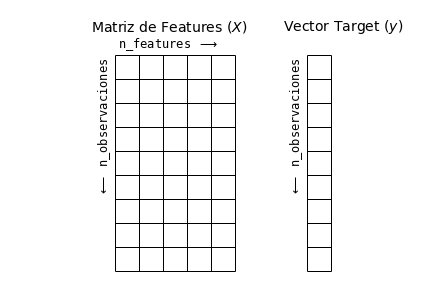

In [ ]:
#@title Matriz de Features
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Matriz de Features ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_observaciones', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Vector Target ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_observaciones', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2);

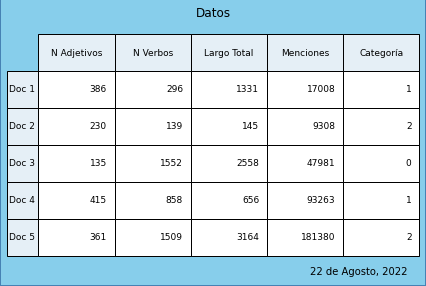

In [ ]:
#@title Tabla Ejemplo
import numpy as np
import matplotlib.pyplot as plt
title_text = 'Datos'
footer_text = '22 de Agosto, 2022'
fig_background_color = 'skyblue'
fig_border = 'steelblue'
data_ =  [
            [         'N Adjetivos', 'N Verbos', 'Largo Total', 'Menciones', 'Categoría'],
            [ 'Doc 1',  386, 296,   1331,  17008,  1],
            ['Doc 2',  230, 139,   145,   9308, 2],
            ['Doc 3',  135,  1552,  2558,  47981, 0],
            ['Doc 4',  415,  858,  656,  93263,  1],
            ['Doc 5', 361, 1509,  3164,  181380,  2],
        ]
column_headers = data_.pop(0)
row_headers = [x.pop(0) for x in data_]

cell_text = []
for row in data_:
    cell_text.append([f'{x}' for x in row])
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           #figsize=(5,3)
          )
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
the_table.scale(1, 2.5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.suptitle(title_text)
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=10, weight='light')
plt.draw()

Para operar sobre la información de texto directamente, el enfoque tradicional más sencillo es la **bolsa de palabras**. Vamos a crearla con sci-kit learn:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos el CV
vec = CountVectorizer()

doc1 = 'la matriz de frecuencias otorga información del contenido de un documento'
doc2 = 'las palabras que aparecen en un documento reflejan sus tópicos'

# Definimos una lista con todos los strings
textos = [doc1, doc2]

# Ajustamos el CV y transformamos los datos
X = vec.fit_transform(textos)

Podemos volcar este resultado en un `DataFrame`. Para obtener el encabezado de las columnas, vamos a utilizar el método `get_feature_names_out()`, propio del vectorizador.

In [ ]:
import pandas as pd
pd.DataFrame(data = X.todense(), columns = vec.get_feature_names_out()).style.background_gradient()

,aparecen,contenido,de,del,documento,en,frecuencias,información,la,las,matriz,otorga,palabras,que,reflejan,sus,tópicos,un
0,0,1,2,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1
1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1


Una vez que tenemos nuestros datos ordenados, podemos ajustar nuestro modelo de aprendizaje automático aproximadamente así:

```python
from sklearn.familia_de_modelos import Modelo
mi_modelo = Modelo(hiperparámetros)
mi_modelo.fit(X, y)

predicción = mi_modelo.predict(nuevo_X)
```

Para ajustar nuestros modelos de machine learning, vamos a tener nuestra matriz de features **X** y un vector **y** (en el caso de ML supervisado), donde **X** tiene la forma ``(n_observaciones, n_variables)`` e **y** ``(n_observaciones)``

# TF-IDF

**Term frequency-inverse document frequency (TF–IDF)** es una técnica alternativa que computa la frecuencia relativa de cada palabra por documento, ponderada por la inversa de su frecuencia relativa a lo largo del *corpus* (colección de documentos). Este método funciona mejor con ciertos algoritmos de clasificación, y es ámpliamente utilizada

Vamos a calcular las matrices de ocurrencias de términos usando sklearn.

Ámbas clases primero construyen el vocabulario total, y luego:  
- **CountVectorizer** nos devuelve la frecuencia absoluta de cada término por cada documento.
- [**TF-IDF**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf): calcula la frecuencia de cada término por documento, y normaliza por el total de documentos donde el término aparece.

$${tf} (t,d)={\frac {f_{t,d}}{\sum _{t'\in d}{f_{t',d}}}}$$

$$
idf( t, D ) = log \frac{ \text{| } D \text{ |} }{ 1 + \text{| } \{ d \in D : t \in d \} \text{ |} }
$$


$$ tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )
$$


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(textos)
pd.DataFrame(data = X.todense(),
             columns = vec.get_feature_names_out()).style.background_gradient()

,aparecen,contenido,de,del,documento,en,frecuencias,información,la,las,matriz,otorga,palabras,que,reflejan,sus,tópicos,un
0,0.000000,0.288525,0.577050,0.288525,0.205288,0.000000,0.288525,0.288525,0.288525,0.000000,0.288525,0.288525,0.000000,0.000000,0.000000,0.000000,0.000000,0.205288
1,0.333102,0.000000,0.000000,0.000000,0.237005,0.333102,0.000000,0.000000,0.000000,0.333102,0.000000,0.000000,0.333102,0.333102,0.333102,0.333102,0.333102,0.237005


## Similitud coseno

Recordando rápidamente la métrica de similitud coseno, podemos utilizarla en conjunto con TF-IDF para calcular similitud entre textos!

$$sim(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||}$$

Con los elementos vistos ya podemos construir el algoritmo de Análisis Semántico Latente, que fue de vanguardia y muy exitoso por muchos años.

Para un ejemplo de TF-IDF con similitud coseno, en el contexto de sistemas de recomendación, véase [la última clase de Machine Learning](https://github.com/institutohumai/cursos-python).

## N-gramas

Muchas veces la unidad lingüística no es una palabra si no que es una palabra compuesta, ya sea en un nombre (ej. "La Rioja") como en palabras compuestas ("italo-americano"). Tomando palabras sueltas, esos significados se pierden.
Para contemplar esto, se pueden tomar combinaciones de N palabras: **n-gramas**.

In [ ]:
data['text'] = data['text'].apply(lambda x: x[:1000])

In [ ]:
# Definimos una lista con los documentos
textos = data['text']

# Instanciamos un CountVectorizer con una tupla indicando el rango de los n-gramas a considerar
vectorizer = CountVectorizer(ngram_range=(2,3), min_df=20)

# Usamos .fit_transform() para ajustar el CV y transformar los datos
X = vectorizer.fit_transform(textos)
print(X.toarray())

# Usando .get_feature_names_out() podemos acceder al indice de palabras
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00 de' '00 de la' '00 en' ... 'únicamente una' 'únicamente una nueva'
 'único que']


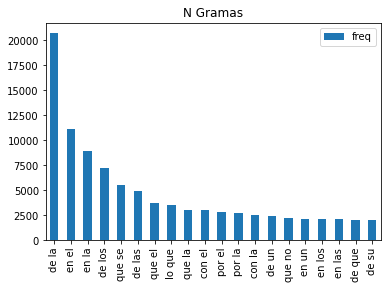

In [ ]:
pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['freq']).sort_values(by='freq',
                                          ascending=False)[:20].plot(kind='bar',title='N Gramas');

## Stop Words



In [ ]:
!pip install stop_words
import stop_words
# Usamos stop words del español
stop_words = stop_words.get_stop_words('es')

In [ ]:
# Instanciamos un CountVectorizer con una tupla indicando el rango de los n-gramas a considerar
vectorizer = CountVectorizer(ngram_range=(2,3), min_df=10, stop_words=stop_words)

# Usamos .fit_transform() para ajustar el CV y transformar los datos
X = vectorizer.fit_transform(textos)

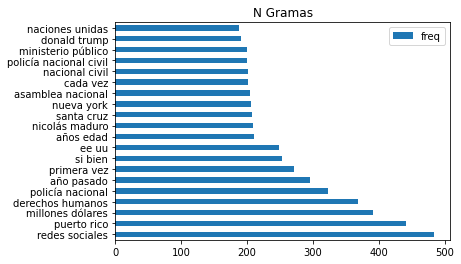

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(X.sum(axis=0).T,
            index=vectorizer.get_feature_names_out(),
            columns=['freq']).sort_values(by='freq',
                                          ascending=False)[:20].plot(kind='barh',title='N Gramas');

## Stemming

In [ ]:
# Instanciamos SnowballStemmer() de NLTK en español
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
# Aplicamos el stemming para cada palabra pasando el string al metodo .stem()
ejemplo = 'mirar miraré codear hacer hachas'
[stemmer.stem(i) for i in nltk.word_tokenize(ejemplo)]

['mir', 'mir', 'cod', 'hac', 'hach']

¿Qué ventajas y desventajas piensan que conlleva el uso de *stemming*?

# SpaCy

Mientras NLTK se centra en técnicas más bien tradicionales, [spaCy](https://spacy.io/) ofrece una API muy cómoda que integra modelos de aprendizaje automático que resuelven tareas típicas de lingüística computacional.


In [ ]:
%%capture
!python -m spacy download es_core_news_md
import numpy as np
import spacy
from spacy import displacy

In [ ]:
# Inicializamos Spacy con modelos en español
nlp = spacy.load('es_core_news_md')

In [ ]:
ejemplo = 'El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!'

In [ ]:
# Instanciamos un Doc de spacy con nuestro texto
doc = nlp(ejemplo)
type(doc)

spacy.tokens.doc.Doc

In [ ]:
for word in doc:
    print(word.text)

El
Doctor
afirmó
que
actuando
de
maneras
probabilísticas
el
cerebro
aprende
conceptos
discretos
.
¡
Qué
fenómeno
misterioso
!


In [ ]:
doc

El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!

## Lemmatización

El *stemming* vemos que es un enfoque bastante bruto para normalizar, desechando parte de la información de la palabra. Podemos tener un problema de polisemia, con una raíz refiriendo a palabras muy distintas. La solución a esto es la **lematización**, que busca llevar a una palabra a su forma canónica o esencial.

In [ ]:
for word in doc:
    print(word.lemma_)

el
Doctor
afirmar
que
actuar
de
manera
probabilística
el
cerebro
aprender
concepto
discreto
.
¡
qué
fenómeno
misterioso
!


## Limitaciones de la Bolsa de Palabras

Utilizando las técnicas que vimos (normalización, n-gramas, stop words) podemos mejorar significativamente el rendimiento de algoritmos de Aprendizaje Automático que se basan en bolsa de palabras.

Sin embargo, si entrenamos un clasificador usando esta matriz, lo que hará es encontrar relaciones estadísticas entre la ocurrencia de cierto token con su categoría (en el caso supervisado). ¿Qué problemas se te puede que puede tener?

- Contexto
- Orden
- Dimensionalidad (variaciones en las palabras, n gramas)


En las próximas clases veremos cómo las redes neuronales abordan estos obstáculos.

# Tareas de NLP

SpaCy integra en su API de una manera elegante atributos y métodos generados por modelos de Aprendizaje Automático.

## Segmentación de oraciones

In [ ]:
list(doc.sents)

[El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos.,
 ¡Qué fenómeno misterioso!]

## Part-Of-Speech Tags

Podemos estimar la función gramatical de cada palabra, accediendo directamente al atributo `.pos_` de cada token:


In [ ]:
for word in doc:
    print(word.text, word.pos_)

El DET
Doctor PROPN
afirmó VERB
que SCONJ
actuando VERB
de ADP
maneras NOUN
probabilísticas ADJ
el DET
cerebro NOUN
aprende VERB
conceptos NOUN
discretos ADJ
. PUNCT
¡ PUNCT
Qué DET
fenómeno NOUN
misterioso ADJ
! PUNCT


## Dependency parsing

¡También contamos con información sobre la co-referencia o dependencia sintáctica entre términos!

In [ ]:
displacy.render(doc, style='dep', jupyter=True)

## Reconocimiento de Entidades

Podemos encontrar las personas (más general, "entes") que se mencionan en los textos:

In [ ]:
doc.ents

(El Doctor,)

In [ ]:
displacy.render(doc, style='ent', jupyter=True);

## Vectores de Palabras

Podemos acceder a los vectores con `.vector`. ¡Veremos en detalle este tema en las próximas clases!

In [ ]:
def cosine_similarity(x, y):
    return x @ y / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
doc

El Doctor afirmó que actuando de maneras probabilísticas el cerebro aprende conceptos discretos. ¡Qué fenómeno misterioso!

In [ ]:
doc2 = nlp("La curiosidad por nuevas ideas es lo que impulsa a derivar ecuaciones y descubrir simetrías.")
doc3 = nlp("Una pizza de napolitana con ajo, una de muzzarella con jamón, media de chocolate y una cerveza roja.")

In [ ]:
doc.similarity(doc2)

0.4817427186959799

In [ ]:
doc.similarity(doc3)

0.3420021954777671

# Referencias:

- [Libro Jurafsky](https://web.stanford.edu/~jurafsky/slp3/)
- [Curso de HuggingFace](https://huggingface.co/course/chapter1/2?fw=pt)


![](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fgilpress%2Ffiles%2F2016%2F03%2FTime-1200x511.jpg)



# Caso: Clasificación de textos como Positivo o Negativo o _Sentiment Analysis_

Vamos a ver un ejemplo sencillo de clasificación de texto, haciendo un sentiment análisis de frases o positivas o negativas.

In [ ]:
# Importamos

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/sentiment.csv')
df.sample(10)

,Sentiment,Phrase
976,NEGATIVE,Es poco accesible al momento de atender nuestr...
1656,POSITIVE,buen material hace dianmica la clase
908,NEGATIVE,"Las clases son agotadoras, son demasiadas cosa..."
400,POSITIVE,Profesor accesible y inspira confianza para co...
264,NEGATIVE,No logra transmitir su conocimiento de una man...
203,POSITIVE,Excelente maestro. Muy interactivas sus clases...
1330,POSITIVE,son buenas sus asesorias como apoyo para los a...
770,POSITIVE,CONSIDERO QUE LA MAESTRA REALIZA MUY BIEN SU T...
1641,POSITIVE,Buen material de trabajo logra la atencion del...
228,POSITIVE,buen profesor ya que relaciona la teória con l...


In [ ]:
df['Sentiment'].value_counts()

POSITIVE    941
NEGATIVE    743
Name: Sentiment, dtype: int64

In [ ]:
# separamos train y test
train, test = train_test_split(df, test_size=0.33)

In [ ]:
# Separamos en X e y
train_y = train.iloc[:,0]
train_X = train.iloc[:,1]
test_y = test.iloc[:,0]
test_X = test.iloc[:,1]

# Vectorizamos los textos por TF-IDF
vec = TfidfVectorizer(min_df=3)
model = MultinomialNB()
clf = make_pipeline(vec,model)

clf = clf.fit(train_X, train_y)

In [ ]:
test_X

128     Sus clases son interactivas y aprendo mucho co...
1062                 clases más didácticas para cada tema
64      En ocaciones se expresa mal hacia los alumnos ...
1682    debería mejorar su manera de dar clases, tomar...
1066          deberia de dar sus clases con menos teoría 
                              ...                        
1598                   Mucha información genera confusión
954            No es congruente lo que dice y lo que hace
1110                El profesor no tiene dominio del tema
75      considero que debe ejercer mayor presencia en ...
811             QUE EXPLIQUE ALGUNAS COSAS MAS A DETALLE.
Name: Phrase, Length: 556, dtype: object

In [ ]:
predictions = clf.predict(test_X)

In [ ]:
sum(predictions == test_y) / len(test_y)

0.85431654676259

In [ ]:
accuracy_score(test_y, predictions)

0.85431654676259

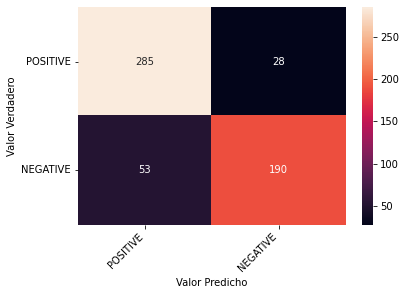

In [ ]:
df_cm = confusion_matrix(test_y,predictions,labels=test_y.unique())
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

In [ ]:
to_predict = "Fue terrible la clase, el profesor se tom\xF3 una siesta y nos hizo usar machine learning para ver cu\xE1nto tiempo dorm\xEDa" #@param {type:"string"}
clf.predict([to_predict])[0]

'NEGATIVE'